# IT Academy - Data Science
## S03 T02: Graphic display of Multiple variables

### Level 1: Practice with the notebook on GitHub "03 EXAMINING DATA" with seaborn and the dataset "tips".

In [1]:
#import requested library
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joypy

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("/Users/giorgiatrupia/Dropbox (Personal)/CODING/Python/DATASETS")

In [2]:
#Download the date set 'tips' and upload it to a panda's Dataframe.
#import data on tips expenses statistics
tips = pd.read_csv('tips.csv', sep=',', encoding='utf8')

#show  subset of rows to display (=10)
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
84,15.98,2.03,Male,No,Thur,Lunch,2
239,29.03,5.92,Male,No,Sat,Dinner,3
31,18.35,2.50,Male,No,Sat,Dinner,4


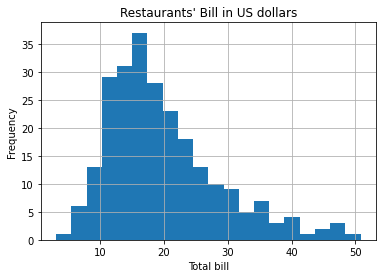

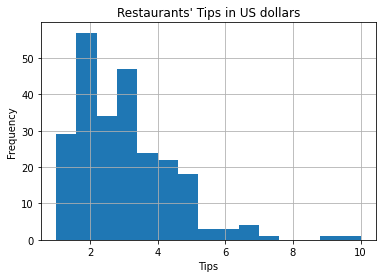

In [3]:
# Histogram Plot to show data density

tips.hist(['total_bill'], bins=20)
plt.title('Restaurants\' Bill in US dollars')
plt.ylabel('Frequency')
plt.xlabel('Total bill')
plt.show()
# --> Data trail off to the right: Right skewed and unimodal distribution of total bill spending at restaurants.

tips.hist(['tip'], bins=15)
plt.title('Restaurants\' Tips in US dollars')
plt.ylabel('Frequency')
plt.xlabel('Tips')
plt.show()

# --> Data trail off to the left: left skewed and bimodal distribution of tips at restaurants.


In [4]:
#show data statistic
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


#### Plot with one numerical variable

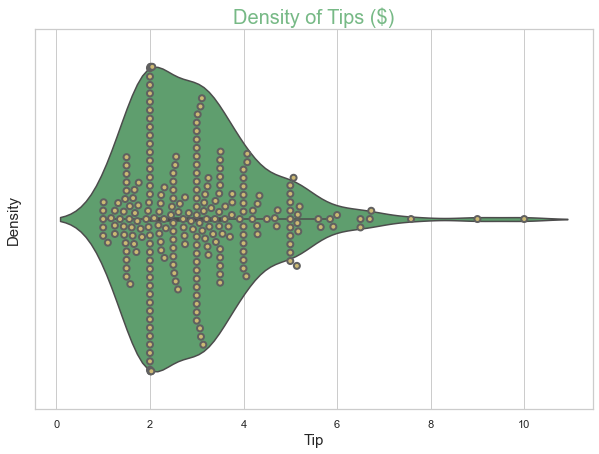

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize =(10, 7))
sns.violinplot(x='tip', data=tips, color="g")
sns.swarmplot(x='tip', data=tips, color="y", linewidth=2, size=6)
plt.title('Density of Tips ($)', fontsize=20, color='g', alpha=0.8)
plt.xlabel('Tip', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

#### Plot with two numerical variables

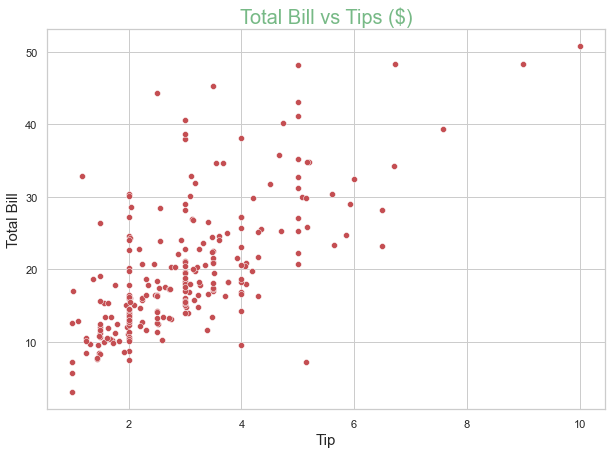

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize =(10, 7))
sns.scatterplot(x='tip', y='total_bill', data=tips, color= "r")
plt.title('Total Bill vs Tips ($)', fontsize=20, color='g', alpha=0.8)
plt.ylabel('Total Bill', fontsize=15)
plt.xlabel('Tip', fontsize=15)
plt.show()

#### Plot with one numerical and one categorical variable

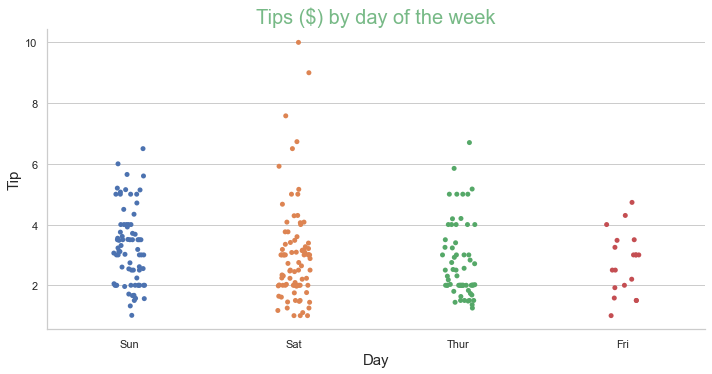

In [7]:
sns.catplot(x='day', y='tip', data=tips, height=5, aspect=2)
plt.title('Tips ($) by day of the week', fontsize=20, color='g', alpha=0.8)
plt.ylabel('Tip', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.show()

#### Plot with one numerical and two categorical variables

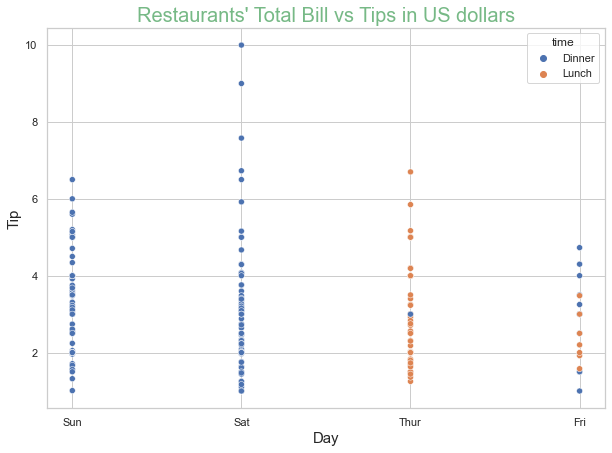

In [8]:
plt.figure(figsize =(10, 7))
sns.scatterplot(x='day', y='tip', data=tips, hue='time')
plt.title('Restaurants\' Total Bill vs Tips in US dollars', fontsize=20, color='g', alpha=0.8)
plt.ylabel('Tip', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.show()

#### Plot with one numerical and three categorical variables

<Figure size 720x504 with 0 Axes>

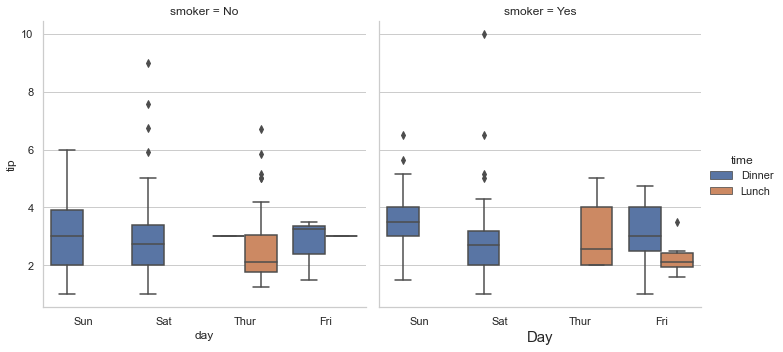

In [9]:
plt.figure(figsize =(10, 7))
sns.catplot(x='day', y='tip', hue='time', col='smoker',
               kind='box', data=tips[tips.tip < 245])
plt.ylabel('Tip', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.show()

#### Matrix Plot: pairwise relationship

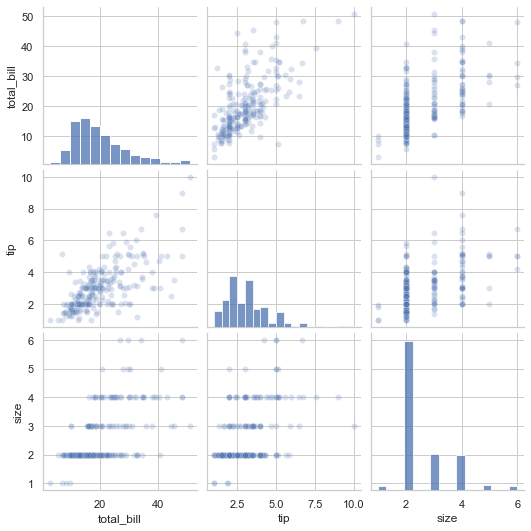

In [10]:
sns.pairplot(tips, diag_kind='hist', plot_kws={'alpha': 0.2})
plt.show()

### Level 2: Repeat the exercise with the dataset movies.dat.

In [11]:
#Download the date set 'movies' and upload it to a panda's Dataframe.
#import data on movies 
file = "movies.dat"
columns = ['ID', 'TITLE', 'GENRES']
movies = pd.read_table(file, sep='::', header=None, names=columns, encoding = "ISO-8859-1", engine='python')

#show  subset of rows to display (=10)
movies.sample(3)

,ID,TITLE,GENRES
2097,2166,Return to Paradise (1998),Drama|Romance
816,827,"Convent, The (Convento, O) (1995)",Drama
3867,3937,Runaway (1984),Sci-Fi|Thriller


In [12]:
#extract year of movies from title and create new column
pattern = "\(([1-2]+[0-9]+[0-9]+[0-9]+)\)"
movies["YEAR"] = movies["TITLE"].apply(lambda x: int(re.search(pattern, x).group(1)))
pattern = "\(.+\)|\s\-.+"
movies["TITLE"] = movies["TITLE"].apply(lambda x: re.sub(pattern, "", x))
movies = movies [['ID', 'TITLE', 'YEAR', 'GENRES']]

movies.sample(3)

,ID,TITLE,YEAR,GENRES
620,625,Asfour Stah,1990,Drama
2446,2515,Children of the Corn II: The Final Sacrifice,1993,Horror
2116,2185,I Confess,1953,Thriller


In [13]:
#create dummy variables of movies's genres
dummyGenres = movies.GENRES.str.get_dummies(sep='|')
movies = movies.join(dummyGenres)

movies.sample(3)

,ID,TITLE,YEAR,GENRES,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1164,1180,Hear My Song,1991,Comedy,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2967,3036,Quest for Fire,1981,Adventure,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3019,3088,Harvey,1950,Comedy,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


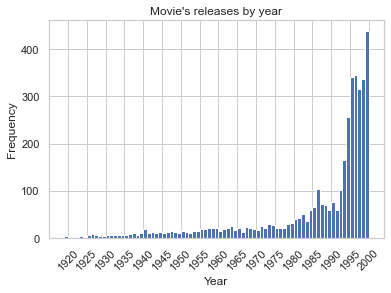

In [14]:
movies.hist(['YEAR'], bins=len(movies.YEAR.value_counts()))
plt.title('Movie\'s releases by year')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.xticks(range(1920,2001,5) ,rotation=45)
plt.show()

#### Plot with one numerical variable

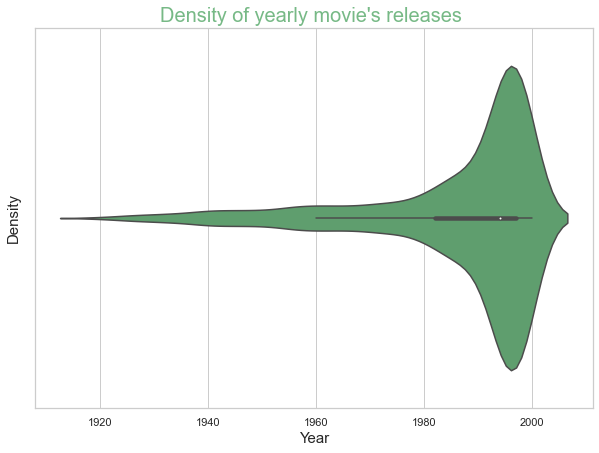

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize =(10, 7))
sns.violinplot(x='YEAR', data=movies, color="g")
plt.title('Density of yearly movie\'s releases ', fontsize=20, color='g', alpha=0.8)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

#### Plot with one numerical and one categorical variable

In [16]:
data1 = dummyGenres.apply(np.sum).sort_values()
data1

Film-Noir        44
Fantasy          68
Western          68
Animation       105
Mystery         106
Musical         114
Documentary     127
War             143
Crime           211
Children's      251
Sci-Fi          276
Adventure       283
Horror          343
Romance         471
Thriller        492
Action          503
Comedy         1200
Drama          1603
dtype: int64

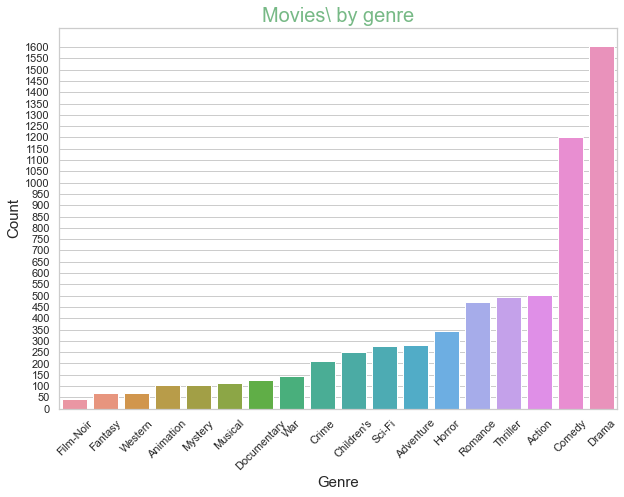

In [17]:
plt.figure(figsize =(10, 7))
sns.set_style("whitegrid")
sns.barplot(x=data1.index, y=data1.values)
plt.title('Movies\ by genre', fontsize=20, color='g', alpha=0.8)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.yticks(range(0,1601,50))
plt.xticks(rotation=45)
plt.show()

#### Plot with one numerical and two categorical variables

### Level 3: show your creativity.

In [19]:
# Create new categorical variable using var year

# take first and last year to create bins of decades as string variable
firstYear = movies["YEAR"].min()
lastYear = movies["YEAR"].max()
bins = list(range(firstYear-10, lastYear+10, 10))
decades = [(str(x+1)) for x in bins] 
decades.pop()

print(decades)

['1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000']


In [20]:
# create dataframe of movies' genre by year
data2 = movies.groupby("YEAR")[dummyGenres.columns].sum()
data2.head(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
YEAR,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#map year to corresponding decade
data2.reset_index(inplace=True)
data2["YEAR"] = pd.cut(data2.YEAR, bins, labels=decades)
data2.rename(columns={"YEAR": "DECADE"}, inplace=True)

#group genres by decade
data2 = data2.groupby("DECADE")[dummyGenres.columns].sum()
data2

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
DECADE,,,,,,,,,,,,,,,,,,
1910,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,1,1,0,0,13,1,0,14,0,0,1,1,0,2,1,2,2,0
1930,3,6,2,4,23,4,1,26,0,1,7,11,5,15,1,9,5,1
1940,2,6,11,13,22,8,0,44,0,17,14,14,9,14,1,17,11,7
1950,10,13,5,10,25,7,1,62,4,9,20,17,7,18,32,16,13,7
1960,17,16,5,20,41,6,1,69,2,2,26,19,5,10,13,24,13,16
1970,41,26,8,25,63,17,2,84,4,1,35,9,6,8,31,22,11,15
1980,110,78,14,31,200,21,9,211,24,4,112,12,12,54,66,55,31,3
1990,299,130,52,139,743,139,105,1036,33,10,120,30,61,333,121,322,55,19


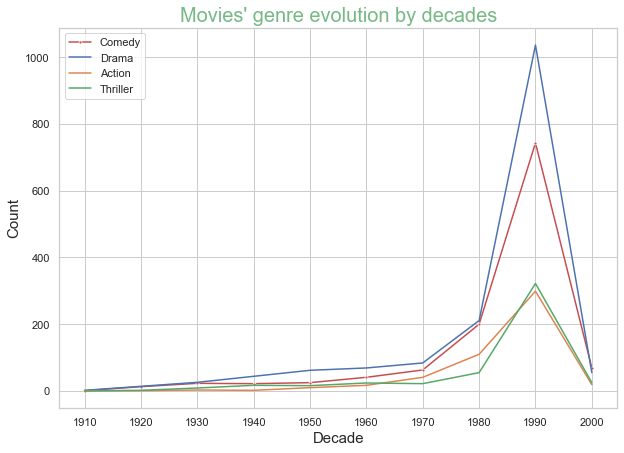

In [22]:
# show evolution of movies' releases by top four genres
plt.figure(figsize =(10, 7))
sns.set_style("whitegrid")
sns.lineplot(x="DECADE", y="Comedy", marker='.', color='r', data=data2)
sns.lineplot(x="DECADE", y="Drama", data=data2)
sns.lineplot(x="DECADE", y="Action", data=data2)
sns.lineplot(x="DECADE", y="Thriller", data=data2)
plt.title('Movies\' genre evolution by decades', fontsize=20, color='g', alpha=0.8)
plt.xlabel("Decade", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(["Comedy", "Drama", "Action", "Thriller"])
plt.show()

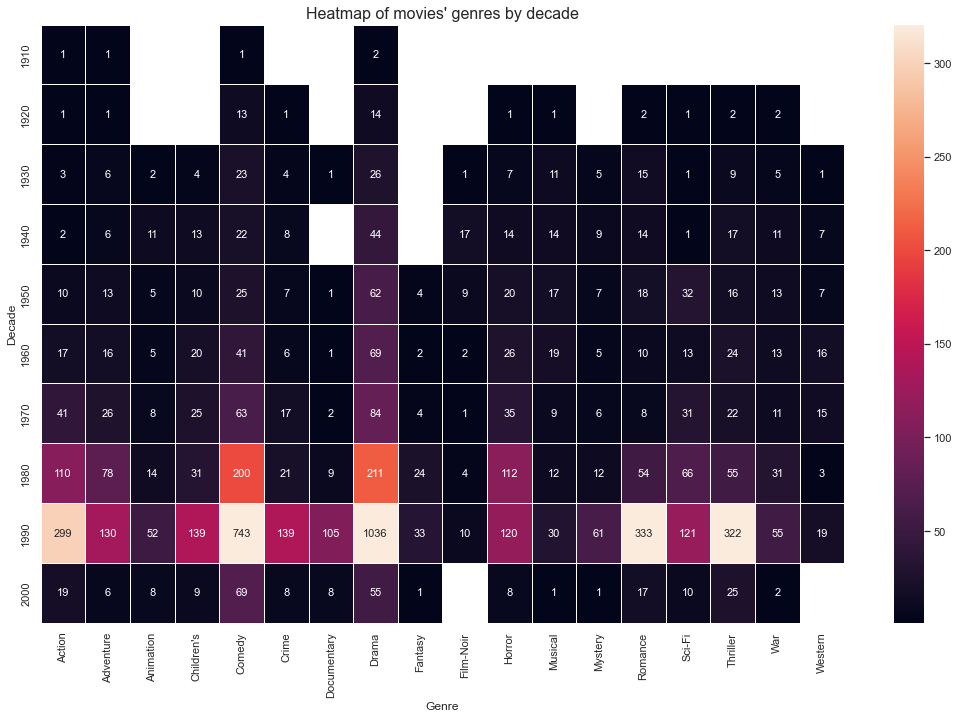

In [23]:
#plot heatmap without zero values
plt.figure(figsize =(18, 11))
mask = data2 == 0
sns.heatmap(data2, annot=True, annot_kws={"size": 11}, robust=True, fmt='.0f',
            mask=mask, linewidth=1, linecolor="w")
plt.title("Heatmap of movies' genres by decade", fontdict={'fontsize':16})
plt.xlabel("Genre")
plt.ylabel("Decade")
plt.show()